In [1]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

# Cluster Separately (P, LVM1, LVM2)

In [3]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/ready_for_clustering.rds")
#####subset in preparation for separate clustering
P <- scdata[ , colData(scdata)$sample == "Parent"]
LVM1 <- scdata[ , colData(scdata)$sample == "Lvm1"]
LVM2 <- scdata[ , colData(scdata)$sample == "Lvm2"]
#####note, the code below is just factored for each dataset (P, LVM1, LVM2)

##############
########cluster P
##############
scdata <- P
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:10, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_P.rds")

##############
########cluster LVM1
##############
scdata <- LVM1
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:10, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_LVM1.rds")

##############
########cluster LVM2
##############
scdata <- LVM2
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:10, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_LVM2.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack


[1] 21

[1] 18

[1] 19


# Visualize datasets clustered separately (P, LVM1, LVM2)

In [2]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
###readin
P <- readRDS("scater/separately_clustered/sc3_clustered_P.rds")
LVM1 <- readRDS("scater/separately_clustered/sc3_clustered_LVM1.rds")
LVM2 <- readRDS("scater/separately_clustered/sc3_clustered_LVM2.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

plot silhouettes to see best cluster number

###Parental

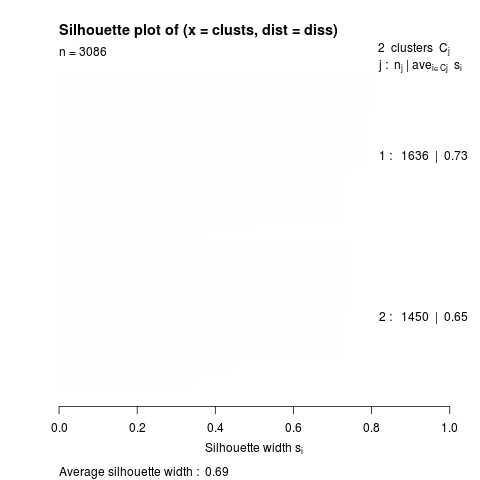

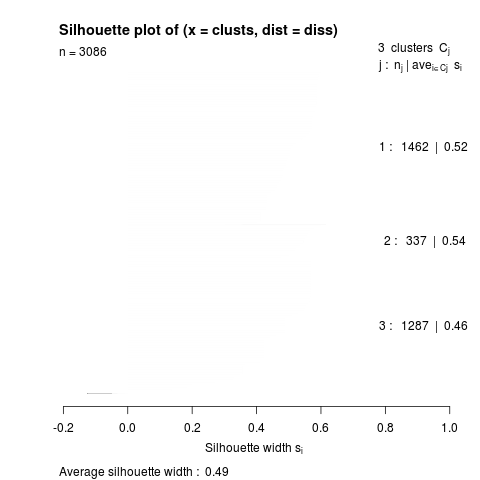

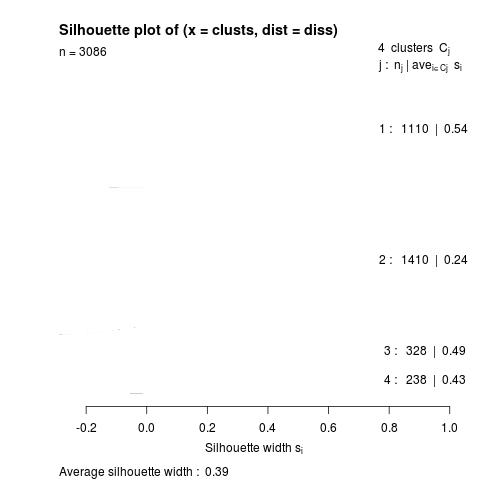

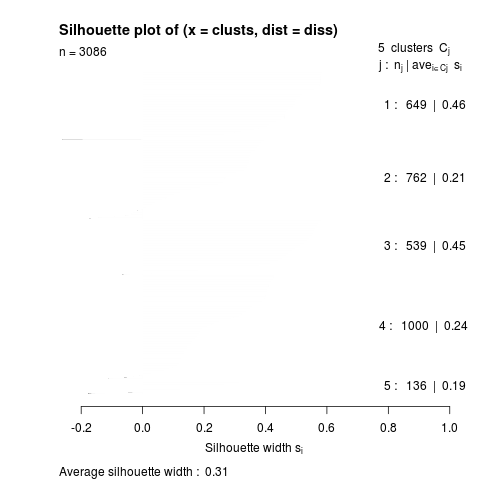

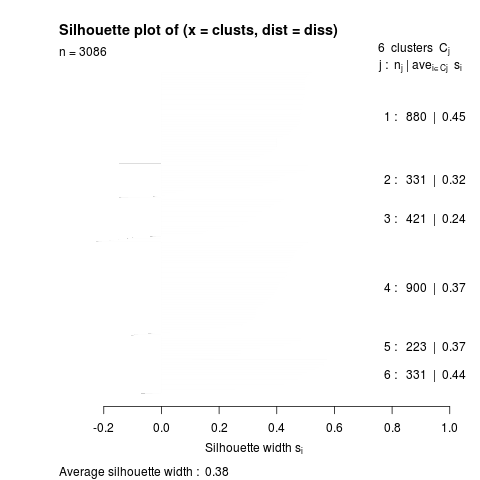

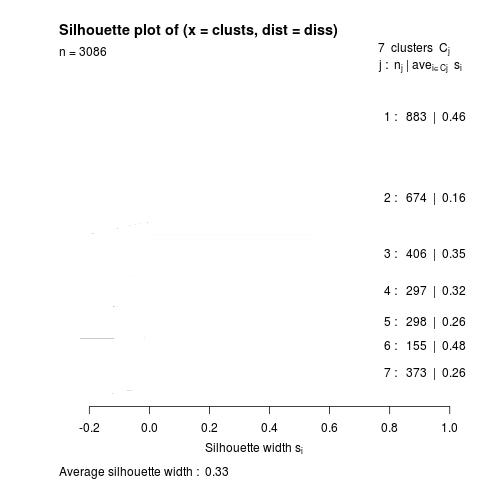

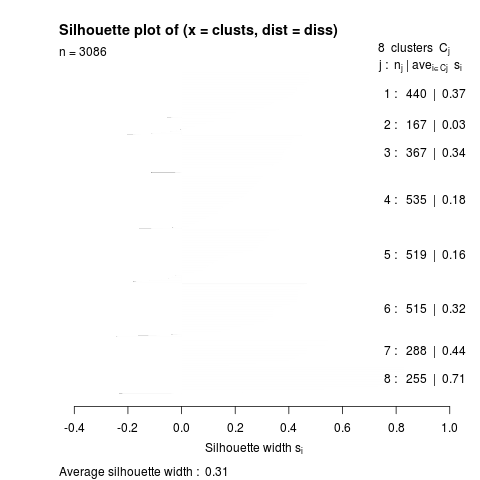

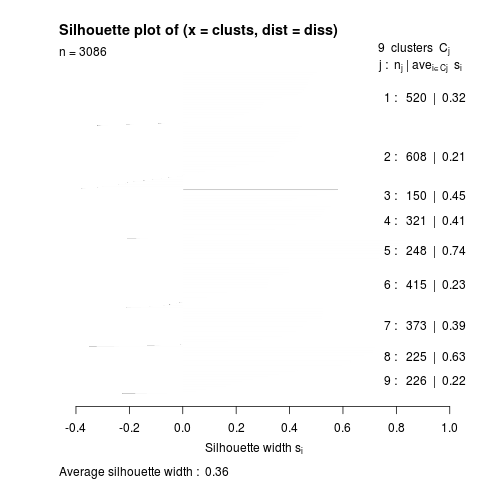

In [5]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(P, k = i)
}

###LVM1

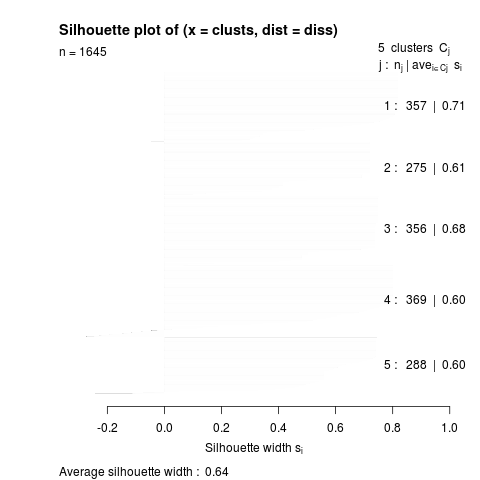

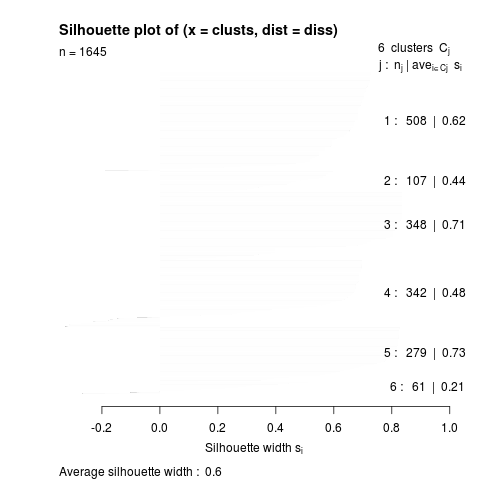

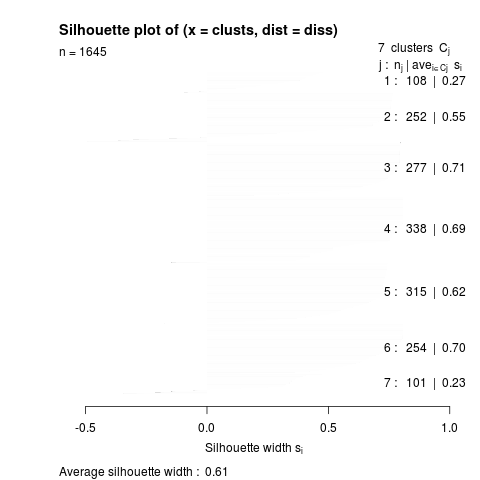

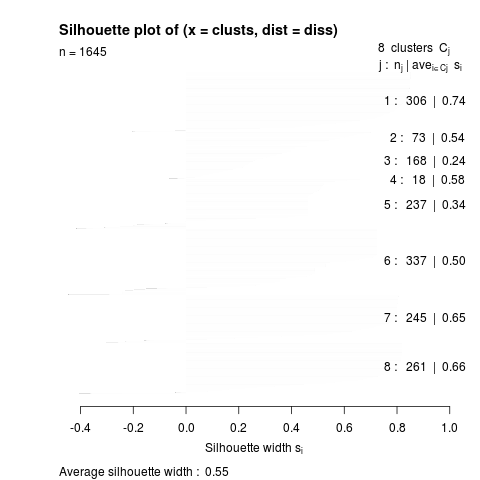

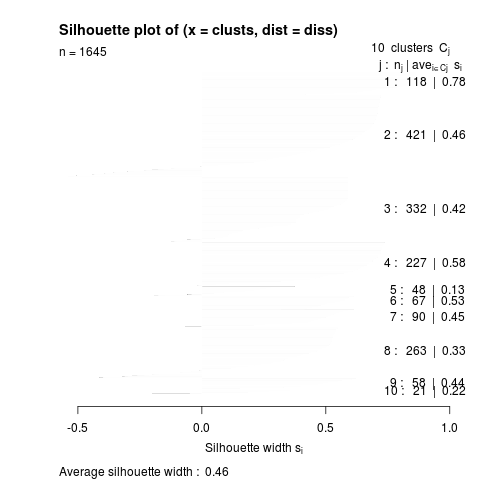

In [6]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(LVM1, k = i)
}    

###LVM2

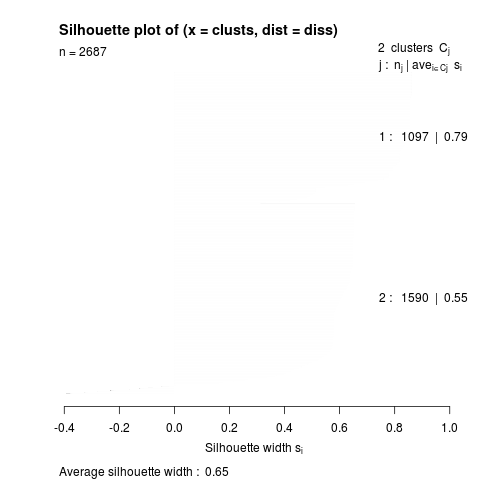

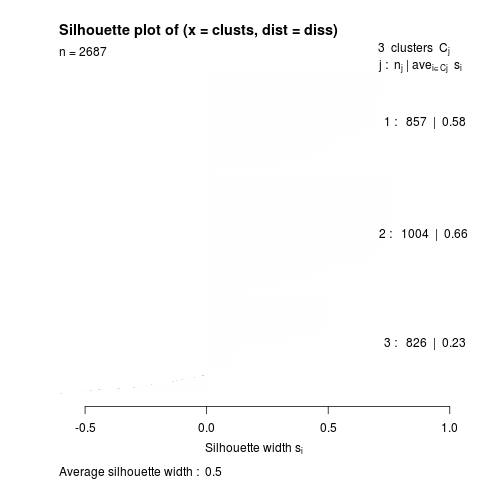

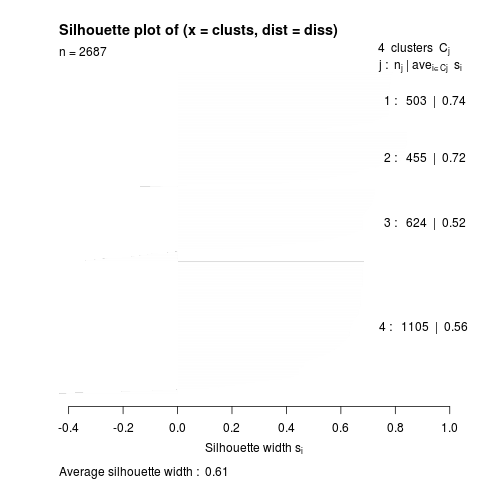

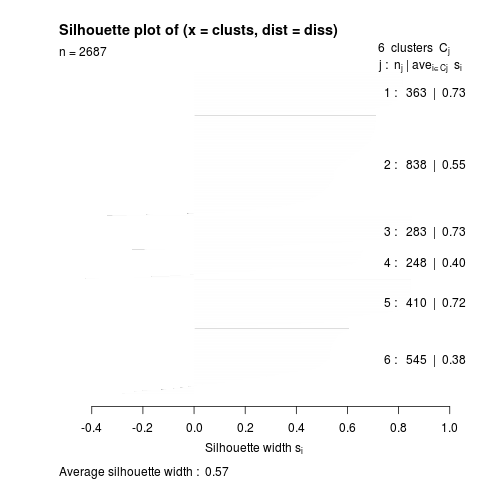

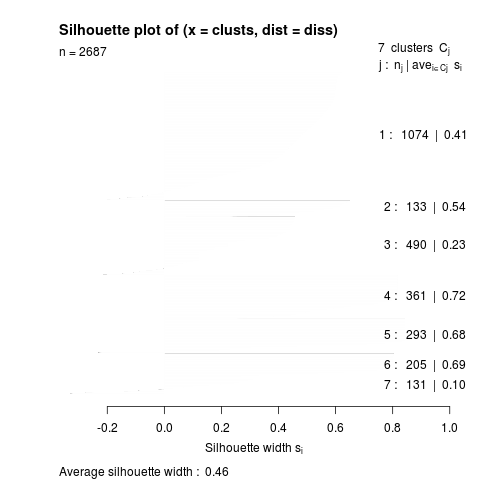

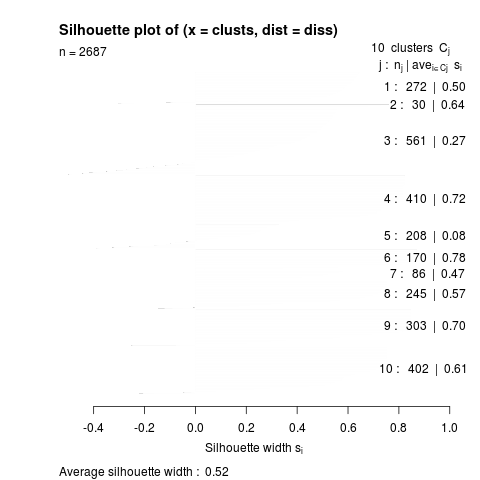

In [7]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(LVM2, k = i)
}

Evaluate Perplexity
run TSNE separately; check perplexity values of 50, 30, 15, 10, 5

In [3]:
%%R
###checking value of 50 
perplex = 50
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [4]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [5]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM1") 

In [6]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM1") 

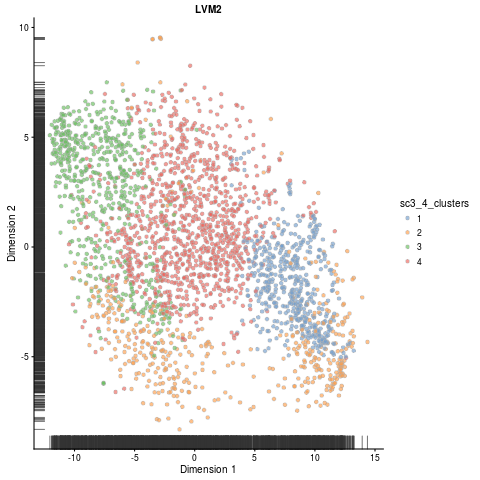

In [7]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM2") 

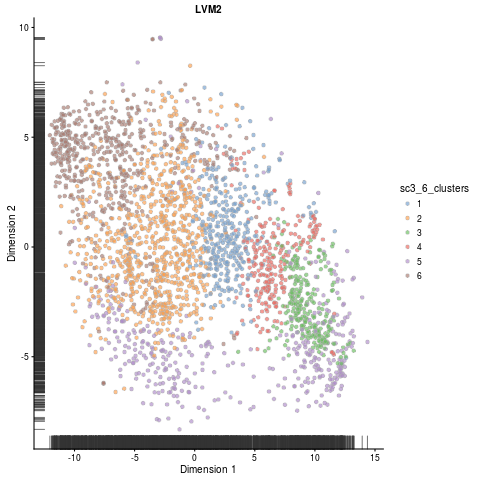

In [8]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM2") 

now checking 30

In [9]:
%%R
###checking value of 30
perplex = 30
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [10]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [11]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM1") 

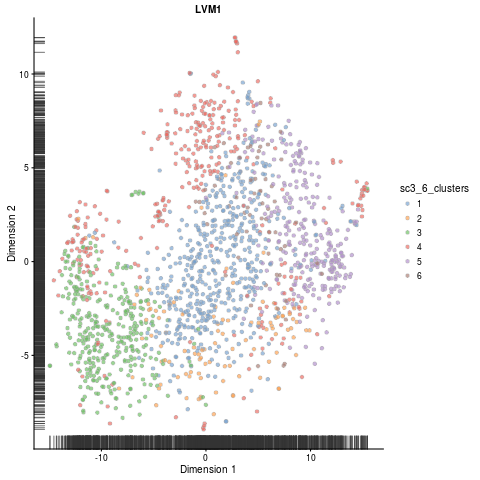

In [12]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM1") 

In [13]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM2") 

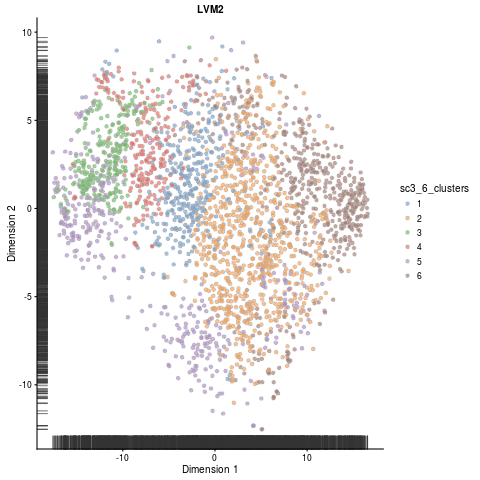

In [14]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM2") 

now checking 15

In [15]:
%%R
###checking value of 15
perplex = 15
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

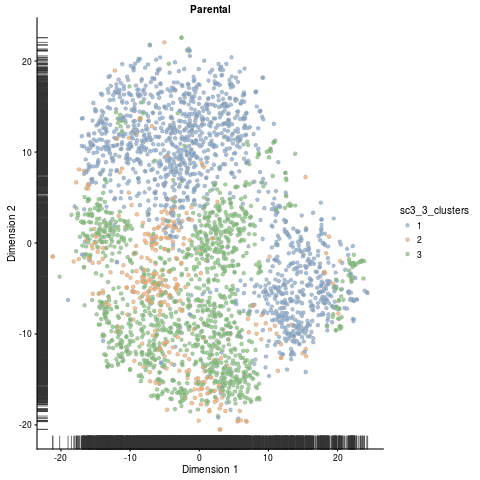

In [16]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

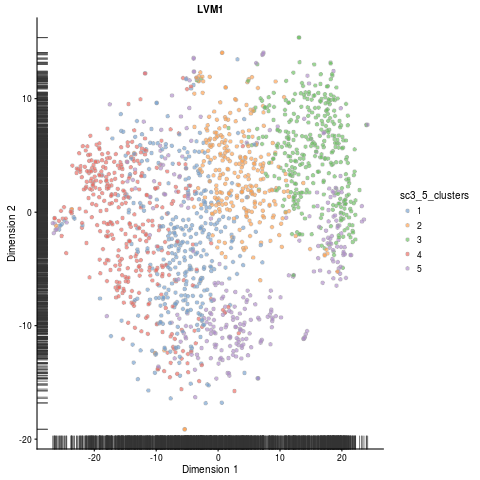

In [17]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM1") 

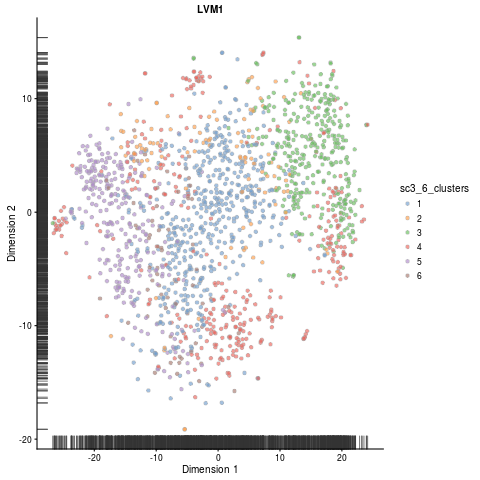

In [18]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM1") 

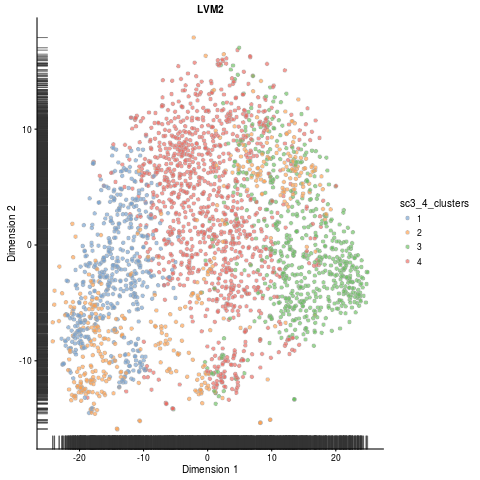

In [19]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM2") 

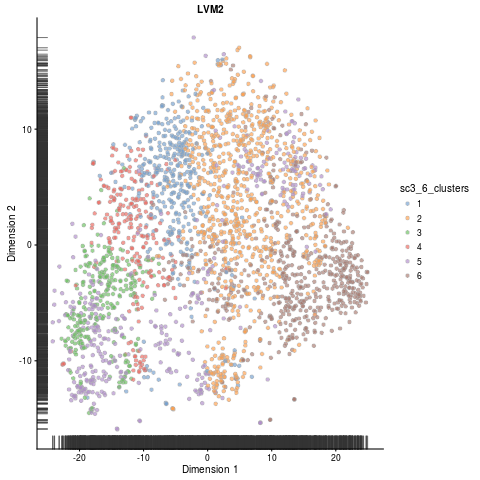

In [20]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM2") 

now checking 10

In [21]:
%%R
###checking value of 10
perplex = 5
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [22]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [23]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM1") 

In [24]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM1") 

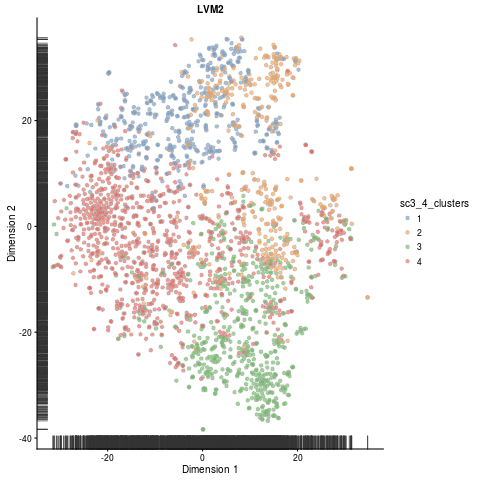

In [25]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM2") 

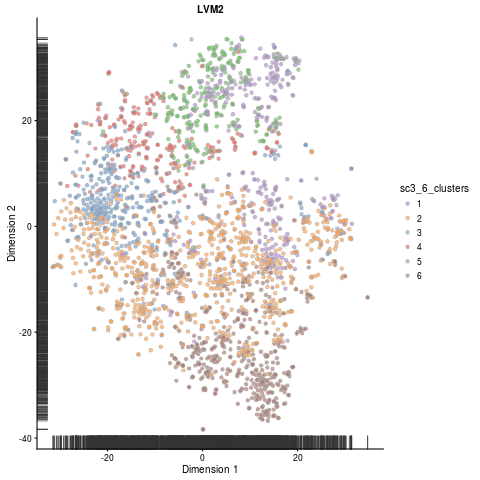

In [26]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM2") 

now checking 5

In [27]:
%%R
###checking value of 5
perplex = 5
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [28]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

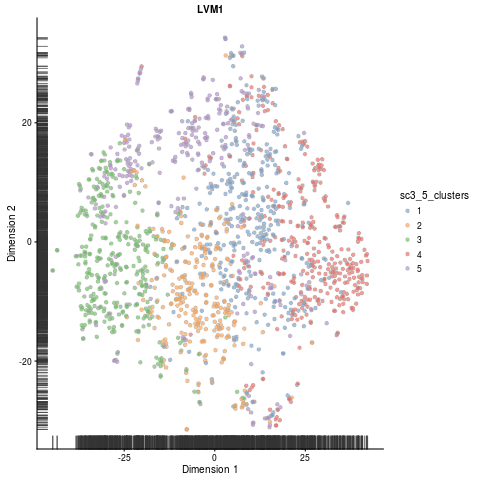

In [29]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM1") 

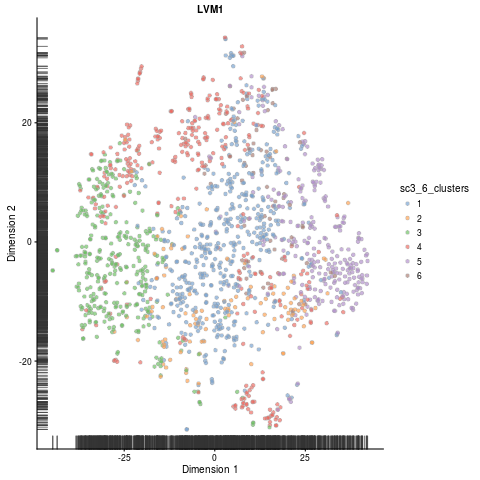

In [30]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM1") 

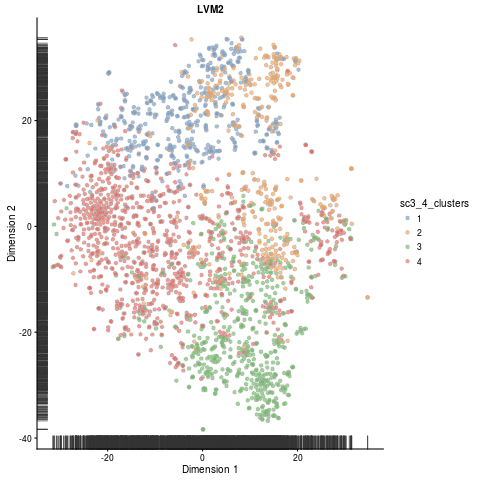

In [31]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM2") 

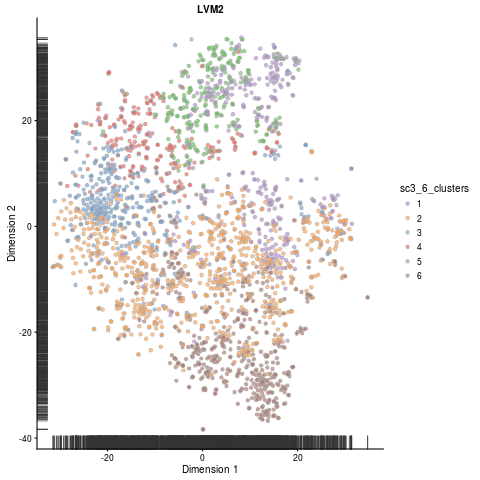

In [32]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_6_clusters"
) + ggtitle("LVM2") 

# perplexity = 50 looks best

In [ ]:
%%R
###checking value of 50 
perplex = 50
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

# ###look at clustering heirarchy trees

In [ ]:
%%R
for (i in 2:10){
    sc3_plot_expression(P, k = i)
}

In [ ]:
%%R
for (i in 2:10){
    sc3_plot_expression(LVM1, k = i)
}

In [ ]:
%%R
for (i in 2:10){
    sc3_plot_expression(LVM2, k = i)
}

save files

In [24]:
%%R
###save files
saveRDS(P, file = "scater/separately_clustered/sc3_clustered_P_vis.rds")
saveRDS(LVM1, file = "scater/separately_clustered/sc3_clustered_LVM1_vis.rds")
saveRDS(LVM2, file = "scater/separately_clustered/sc3_clustered_LVM2_vis.rds")

NameError: name 'saveRDS' is not defined

TEST BELOW!

In [15]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/ready_for_clustering.rds")
######


In [17]:
%%R

sce <- SingleCellExperiment(
    assays = list(
        counts = as.matrix(counts(scdata)),
        logcounts = log2(as.matrix(counts(scdata)) + 1)
    )
)

In [18]:
%%R

###
rowData(sce)$feature_symbol <-rownames(sce)
###
scdata <- sce
####cluster
scdata <- sc3(scdata, ks = 9:10, biology = TRUE,n_cores=16)



/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Setting SC3 parameters...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Defining training cells for SVM using 5000 random cells...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Calculating distances between the cells...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Performing transformations and calculating eigenvectors...

  warnings.warn(x, RRuntimeWarning)
/home/

In [20]:
%%R

scdata <- runTSNE(scdata,exprs_values='logcounts',perplexity = 30,rand_seed = 123456)

In [21]:
%%R

###plot TSNE

plotTSNE(
    scdata,
    colour_by = "sample"
)


Error in .choose_vis_values(object, colour_by, cell_control_default = TRUE,  : 
  'sample' not found in 'colnames(colData(x))' or in 'rownames(x)'


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in .choose_vis_values(object, colour_by, cell_control_default = TRUE,  : 
  'sample' not found in 'colnames(colData(x))' or in 'rownames(x)'

  warnings.warn(x, RRuntimeWarning)


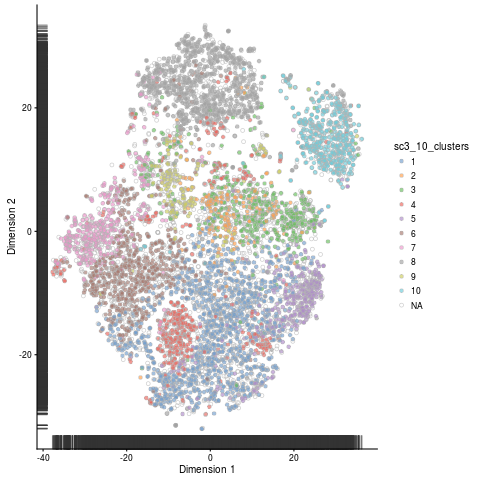

In [22]:
%%R

###plot TSNE

plotTSNE(
    scdata,
    colour_by = "sc3_10_clusters"
)